# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

np.random.seed(5)

## Read Data

In [4]:
from sklearn.preprocessing import StandardScaler
# Read data from txt/csv using numpy
X_original = np.loadtxt('data.csv', dtype=np.float, delimiter=',')
# Normalization
X = StandardScaler().fit_transform(X_original)
# print('X:', X)
names = ['RG11', 'RG12', 'RG19', 'RG110', 'RG113', 'RG120', 'RG6', 'RG2', 'RG4']
name_mappings = [(name, i) for name,i in enumerate(names)]
print('name_mappings:', name_mappings)
y = np.arange(len(names))
print('y:', y)

name_mappings: [(0, 'RG11'), (1, 'RG12'), (2, 'RG19'), (3, 'RG110'), (4, 'RG113'), (5, 'RG120'), (6, 'RG6'), (7, 'RG2'), (8, 'RG4')]
y: [0 1 2 3 4 5 6 7 8]


In [ ]:
# import pandas as pd

# read csv file
# df = pd.read_csv('data.csv', encoding='utf-8')
# write csv file
# df.to_csv('data.csv', index=False, encoding='utf-8')
# read raw text file with whitespace as delimiter
# df=pd.read_table(filename, delim_whitespace=True, encoding='utf-8')

## Project to 3D

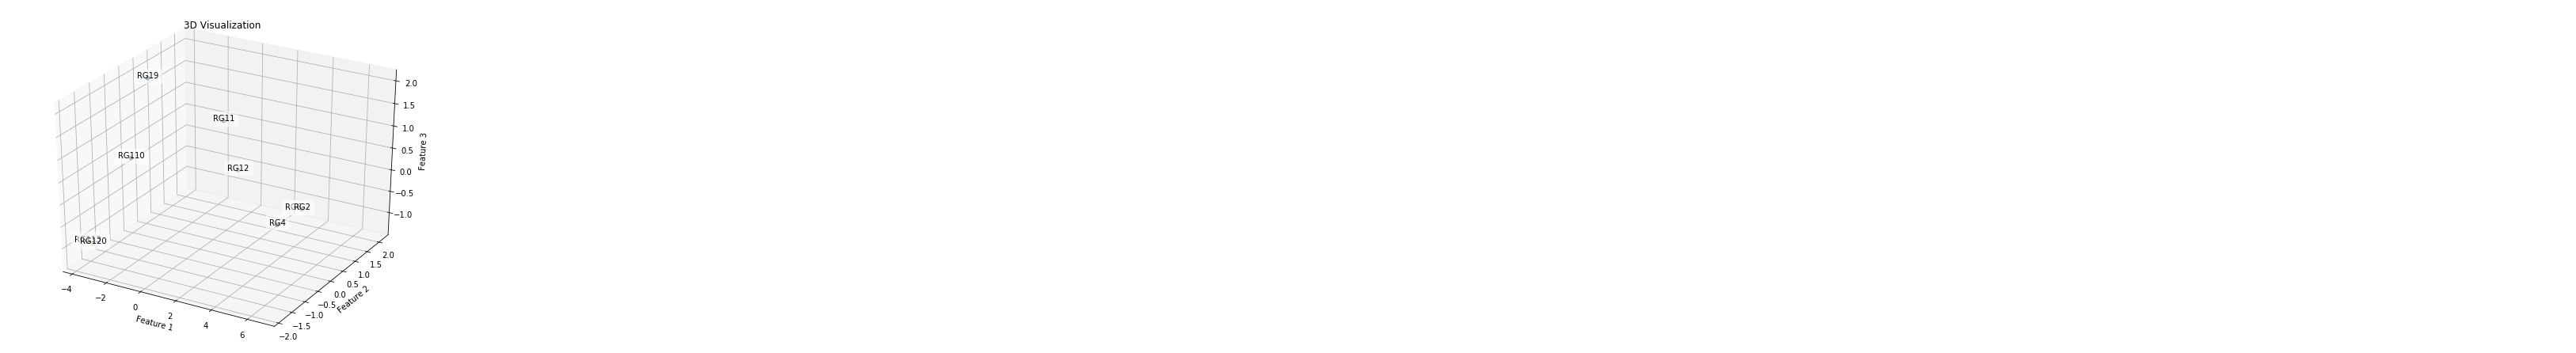

In [6]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X3d = pca.transform(X)
# print(X)
for label, name in name_mappings:
    ax.text3D(X3d[y == label, 0].mean(),
              X3d[y == label, 1].mean(),
              X3d[y == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w',facecolor='w'))

ax.scatter(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')
ax.set_title("3D Visualization")
ax.set_xlabel("Feature 1")
# ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

## project to 2D

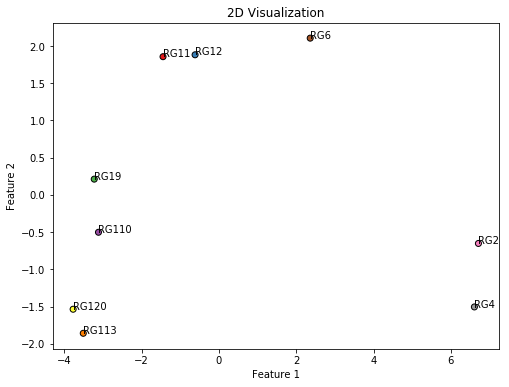

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X2d = pca.transform(X)
plt.figure(2, figsize=(8, 6))
plt.clf()
for label, name in name_mappings:
    x_text = X2d[y == label, 0].mean()
    y_text = X2d[y == label, 1].mean()
    plt.text(x_text, y_text, name)

plt.scatter(X2d[:, 0], X2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("2D Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks()
plt.yticks()
plt.show()

## Use T-SNE

效果比较差，数据比较离散，但是聚类不好

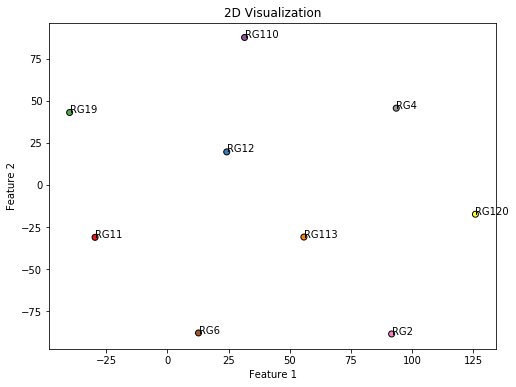

In [13]:
from sklearn.manifold import TSNE

# optional arguments: init='pca', random_state=0
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
X_t2d = tsne.embedding_
plt.figure(3, figsize=(8, 6))
plt.clf()
for label, name in name_mappings:
    x_text = X_t2d[y == label, 0].mean()
    y_text = X_t2d[y == label, 1].mean()
    plt.text(x_text, y_text, name)

plt.scatter(X_t2d[:, 0], X_t2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("2D Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks()
plt.yticks()
plt.show()